In [77]:
import fnmatch
import os
import re
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
from IPython.display import display, Markdown

%matplotlib notebook

In [2]:
xx = np.array([  0.        ,   3.16120312,   6.00982966,   8.58559556,
        10.9200373 ,  13.0385682 ,  14.96192158,  16.70718745,
        18.28857234,  19.7179658 ,  21.00536944,  22.15922588,
        23.18667382,  24.09374765,  24.88553454,  25.56629884,
        26.13958045,  26.60827258,  26.97468256,  27.24057867,
        27.40722489,  27.47540528,  27.4454549 ,  27.31759055,
        27.09240496,  26.77093319,  26.35463385,  25.84536308,
        25.24534223,  24.55712059,  23.78353419,  22.92766225,
        21.99278236,  20.98232583,  19.89983412,  18.74891739,
        17.53321593,  16.25636497,  14.92196332,  13.53354602,
        12.09456104,  10.60834996,   9.07813253,   7.50699473,
         5.89788016,   4.2535843 ,   2.57675137,   0.86987341,  -0.86470875])

In [91]:
%%capture
fig = plt.figure()
n_start = 20

mus = {}
sigmas = {}

for file in os.listdir('.'):
    if fnmatch.fnmatch(file, '*_mus.csv'):
        mus[file[0:-8]] = np.genfromtxt(file)
    if fnmatch.fnmatch(file, '*_sigmas.csv'):
        sigmas[file[0:-11]] = np.genfromtxt(file)

mse = {}
loglikelihood = {}
md ="""
   | Mean Squarred Error (small = good) | Log Likelihood (large = good)
---|------------------------------------|------------------------------"""
z = 0
for _key, _mus in mus.items():
    mse[_key] = np.sqrt(np.mean((_mus[n_start:] - xx[n_start:])**2))
    mean[_key] = np.mean(_mus[n_start:]-xx[n_start:])
    plt.plot(range(n_start, len(_mus)),
             _mus[n_start:]-xx[n_start:],
             label=_key,
             color=plt.cm.Vega10(z))
    plt.plot(range(n_start+1),
             _mus[:n_start+1]-xx[:n_start+1],
             '--',
             color=plt.cm.Vega10(z))

    md += "\n{} | {} |".format(_key, mse[_key])
    if sigmas.get(_key) is None:
        print(_key + " has not submitted sigmas")
    else:
        _sigmas = sigmas[_key]
        loglikelihood[_key] = np.mean(norm.logpdf(x=xx[n_start:], loc=_mus[n_start:], scale=_sigmas[n_start:]))
        plt.fill_between(range(len(_mus)), -2*_sigmas, 2*_sigmas, color=plt.cm.Vega10(z)[0:3], alpha=0.1)
        md += " {}".format(loglikelihood[_key])
    z = z+1
plt.legend()


   | Mean Squarred Error (small = good) | Log Likelihood (large = good)
---|------------------------------------|------------------------------
LukasKoestler | 0.903375650001029 | -1.4486514924650995
QuiteBad | 2.2459676246738995 | -3.0217275288482295
QuiteOptimal | 0.4796841225805308 | -0.7928668031871786

<IPython.core.display.Javascript object>


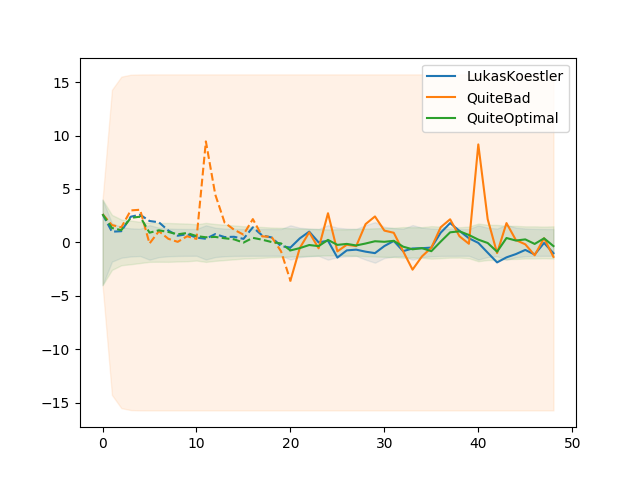

In [92]:
display(Markdown(md))
display(fig)